In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Set file path
file_path = "Resources/combined_csv.csv"

In [3]:
# Read csv 
file_df = pd.read_csv(file_path)

# Display data frame
file_df.head()

,timestamp,open,high,low,close,volume,Ticker,Sector
0,2020-07-02,48.41,49.08,47.245,47.79,18193240,MS,Financials
1,2020-06-30,44.52,51.85,43.950,48.30,296550339,MS,Financials
2,2020-05-29,38.35,47.32,35.530,44.20,252483991,MS,Financials
3,2020-04-30,31.68,41.85,31.160,39.43,346304903,MS,Financials
4,2020-03-31,45.11,46.92,27.200,34.00,581088494,MS,Financials


In [4]:
# Sort the data frame by timestamp
sorted_df = file_df.sort_values(by=['timestamp'])

# Display data frame
sorted_df.head()

,timestamp,open,high,low,close,volume,Ticker,Sector
11173,2000-07-31,85.44,91.94,78.12,81.81,21970800,UNH,Health Care
13820,2000-07-31,101.30,101.40,90.25,93.06,67023900,JNJ,Health Care
959,2000-08-31,20.50,23.69,20.00,23.13,17514100,TMO,Health Care
18859,2000-08-31,75.25,111.60,74.88,108.00,13343200,GILD,Health Care
5857,2000-08-31,99.00,129.50,97.00,129.50,53400600,GS,Financials


In [5]:
# Create a cleaned data frame that excludes every thing before 2014-12-31
cleaned_df = sorted_df.loc[(sorted_df['timestamp']>'2014-11-30')]

# Create a data frame that excludes 2020 data
predict_df = cleaned_df.loc[(cleaned_df['timestamp']<'2020-01-01')]

# Print the data frame
print(cleaned_df)

# Display data frame
predict_df.tail()

        timestamp    open    high      low    close     volume Ticker  \
5457   2014-12-31   85.88   91.94   81.660   89.310   62647413    ACN   
7775   2014-12-31   73.41   75.66   70.780   72.200  150299734    MDT   
15088  2014-12-31  148.61  152.94  144.750  150.150   93432673  BRK.B   
19876  2014-12-31   46.46   49.68   44.910   47.710   38554847      O   
18208  2014-12-31   27.50   28.59   26.150   27.815  577451832   CSCO   
...           ...     ...     ...      ...      ...        ...    ...   
960    2020-07-02  126.60  127.17  124.670  125.810    8821479    TXN   
7468   2020-07-02   63.75   65.41   63.660   64.430    1589739   BF-B   
7228   2020-07-02   27.50   29.46   27.280   28.470    8471003   PEAK   
6754   2020-07-02   42.15   42.77   40.750   41.980   14948347    WBA   
0      2020-07-02   48.41   49.08   47.245   47.790   18193240     MS   

                       Sector  
5457   Information Technology  
7775              Health Care  
15088              Financia

,timestamp,open,high,low,close,volume,Ticker,Sector
15028,2019-12-31,220.60,228.23,216.3952,226.50,79367551,BRK.B,Financials
9981,2019-12-31,136.65,138.25,134.3200,136.67,82804561,PEP,Consumer Staples
5625,2019-12-31,220.97,232.21,210.0000,229.93,46388859,GS,Financials
14308,2019-12-31,216.46,241.81,200.3700,235.30,164328924,NVDA,Information Technology
13828,2019-12-31,495.28,506.81,478.6800,502.70,8977543,BLK,Financials


In [6]:
# Sort the cleaned df by ticker and timestamp
sorted_cleaned_df = cleaned_df.sort_values(['Ticker', 'timestamp'], ascending = True)

# Create quarterly data frame for 2015
first_df_1 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2014-11-30') & 
                                   (sorted_cleaned_df['timestamp'] <= '2015-03-31')]

first_df_2 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2015-03-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2015-06-30')]

first_df_3 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2015-06-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2015-09-30')]

first_df_4 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2015-09-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2015-12-31')]

# Create quarterly data frame for 2016
second_df_1 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2015-11-30') & 
                                    (sorted_cleaned_df['timestamp'] <= '2016-03-31')]

second_df_2 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2016-03-15') & 
                                    (sorted_cleaned_df['timestamp'] <= '2016-06-30')]

second_df_3 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2016-06-15') & 
                                    (sorted_cleaned_df['timestamp'] <= '2016-09-30')]

second_df_4 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2016-09-15') & 
                                    (sorted_cleaned_df['timestamp'] <= '2016-12-31')]


# Create quarterly data frame for 2017
third_df_1 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2016-11-30') & 
                                   (sorted_cleaned_df['timestamp'] <= '2017-03-31')]

third_df_2 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2017-03-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2017-06-30')]

third_df_3 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2017-06-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2017-09-30')]

third_df_4 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2017-09-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2017-12-31')]


# Create quarterly data frame for 2018
fourth_df_1 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2017-11-30') & 
                                    (sorted_cleaned_df['timestamp'] <= '2018-03-31')]

fourth_df_2 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2018-03-15') & 
                                    (sorted_cleaned_df['timestamp'] <= '2018-06-30')]

fourth_df_3 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2018-06-15') & 
                                    (sorted_cleaned_df['timestamp'] <= '2018-09-30')]

fourth_df_4 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2018-09-15') & 
                                    (sorted_cleaned_df['timestamp'] <= '2018-12-31')]


# Create quarterly data frame for 2019
fifth_df_1 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2018-11-30') & 
                                   (sorted_cleaned_df['timestamp'] <= '2019-03-31')]

fifth_df_2 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2019-03-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2019-06-30')]

fifth_df_3 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2019-06-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2019-09-30')]

fifth_df_4 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2019-09-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2019-12-31')]

# Create quarterly data frame for 2020
sixth_df_1 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2019-11-30') & 
                                   (sorted_cleaned_df['timestamp'] <= '2020-03-31')]

sixth_df_2 = sorted_cleaned_df.loc[(sorted_cleaned_df['timestamp'] > '2020-03-15') & 
                                   (sorted_cleaned_df['timestamp'] <= '2020-06-30')]
# Display a data frame 
sixth_df_2

,timestamp,open,high,low,close,volume,Ticker,Sector
4434,2020-03-31,282.28,304.00,212.61,254.29,1570331732,AAPL,Information Technology
4433,2020-04-30,246.50,294.53,236.90,293.80,816530808,AAPL,Information Technology
4432,2020-05-29,286.25,324.24,285.85,317.94,701660022,AAPL,Information Technology
4431,2020-06-30,317.75,372.38,317.21,364.80,810900890,AAPL,Information Technology
20293,2020-03-31,86.00,91.86,62.55,76.19,368052041,ABBV,Health Care
...,...,...,...,...,...,...,...,...
15262,2020-06-30,123.44,124.41,117.01,119.78,185696536,WMT,Consumer Staples
5154,2020-03-31,26.14,28.36,13.10,16.95,162939319,WY,Real Estate
5153,2020-04-30,15.87,22.71,15.11,21.87,112460847,WY,Real Estate
5152,2020-05-29,19.68,22.13,16.05,20.19,137395744,WY,Real Estate


In [7]:
# Function to calculate percent change
def total_return(close):
   return close.iloc[-1] / close.iloc[0]-1

# Create a data frame to hold percent change data for each company
percentchange = pd.DataFrame(first_df_1.groupby(['Ticker'])['close'].apply(total_return))
percentchange = percentchange.rename(columns = {"close":"2015_Q1"})
percentchange["2015_Q2"] = first_df_2.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2015_Q3"] = first_df_3.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2015_Q4"] = first_df_4.groupby(['Ticker'])['close'].apply(total_return)

percentchange["2016_Q1"] = second_df_1.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2016_Q2"] = second_df_2.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2016_Q3"] = second_df_3.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2016_Q4"] = second_df_4.groupby(['Ticker'])['close'].apply(total_return)

percentchange["2017_Q1"] = third_df_1.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2017_Q2"] = third_df_2.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2017_Q3"] = third_df_3.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2017_Q4"] = third_df_4.groupby(['Ticker'])['close'].apply(total_return)

percentchange["2018_Q1"] = fourth_df_1.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2018_Q2"] = fourth_df_2.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2018_Q3"] = fourth_df_3.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2018_Q4"] = fourth_df_4.groupby(['Ticker'])['close'].apply(total_return)

percentchange["2019_Q1"] = fifth_df_1.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2019_Q2"] = fifth_df_2.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2019_Q3"] = fifth_df_3.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2019_Q4"] = fifth_df_4.groupby(['Ticker'])['close'].apply(total_return)

percentchange["2020_Q1"] = sixth_df_1.groupby(['Ticker'])['close'].apply(total_return)
percentchange["2020_Q2"] = sixth_df_2.groupby(['Ticker'])['close'].apply(total_return)
percentchange = percentchange.reset_index()
percentchange

,Ticker,2015_Q1,2015_Q2,2015_Q3,2015_Q4,2016_Q1,2016_Q2,2016_Q3,2016_Q4,2017_Q1,...,2018_Q1,2018_Q2,2018_Q3,2018_Q4,2019_Q1,2019_Q2,2019_Q3,2019_Q4,2020_Q1,2020_Q2
0,AAPL,0.127288,0.007996,-0.120590,-0.045694,0.035436,-0.122855,0.182531,0.024502,0.240373,...,-0.008568,0.103290,0.219491,-0.301232,0.204197,0.041958,0.131619,0.311113,-0.134037,0.434583
1,ABBV,-0.105440,0.147762,-0.190207,0.088770,-0.035787,0.083859,0.018737,-0.007135,0.040562,...,-0.021301,-0.021130,0.020831,-0.025270,-0.125827,-0.097655,0.041254,0.169308,-0.139485,0.288621
2,ABT,0.029098,0.059357,-0.180522,0.116609,-0.068582,-0.060244,0.075808,-0.091747,0.156209,...,0.049939,0.017857,0.202820,-0.014040,0.105212,0.052039,-0.005113,0.038126,-0.091527,0.158662
3,ACN,0.049043,0.032981,0.015292,0.063505,0.104306,-0.018284,0.078383,-0.041254,0.023478,...,0.002678,0.065733,0.040406,-0.171504,0.248280,0.049710,0.041024,0.094723,-0.224676,0.315203
4,ADBE,0.017056,0.095618,0.014936,0.142544,-0.001490,0.021215,0.133104,-0.051502,0.264012,...,0.233052,0.128332,0.107215,-0.161919,0.177908,0.105670,-0.062447,0.193882,-0.035081,0.367867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,WBA,0.111286,-0.002834,-0.015869,0.024729,-0.010745,-0.011515,-0.031824,0.026544,0.003504,...,-0.098458,-0.083321,0.214696,-0.062689,-0.074052,-0.135925,0.011707,0.065992,-0.224050,-0.073443
93,WELL,0.022334,-0.151629,0.031845,0.004578,0.019256,0.098500,-0.018380,-0.104855,0.058120,...,-0.146464,0.151755,0.026001,0.079136,0.117995,0.050644,0.111861,-0.097849,-0.440205,0.130406
94,WFC,-0.007661,0.033824,-0.086949,0.058617,-0.110375,-0.021299,-0.064441,0.244580,0.009980,...,-0.136146,0.057813,-0.051948,-0.123288,0.048611,-0.020695,0.065934,0.066614,-0.466543,-0.108014
95,WMT,-0.042268,-0.137629,-0.085859,-0.054596,0.117292,0.066141,-0.012325,-0.041597,0.042824,...,-0.099038,-0.037316,0.096439,-0.008093,0.047021,0.132882,0.074124,0.001348,-0.043925,0.054216


In [8]:
# List with tickers for the respected sector
consumer_staples = ['WMT', 'PG', 'KO', 'PEP', 'COST', 'PM', 'MO', 'MDLZ', 'EL', 'CL', 
                    'KMB', 'KHC', 'WBA', 'GIS', 'MNST', 'STZ', 'BF-B', 'SYY', 'CLX', 'KR']

finance = ['BRK.B', 'JPM', 'BAC', 'WFC', 'C', 'BLK', 'SPGI', 'AXP', 'MS', 'GS', 
           'CME', 'CB','USB', 'MMC', 'MCO', 'TFC', 'ICE', 'PGR', 'PNC', 'AON']

health_care = ['JNJ', 'UNH', 'MRK', 'PFE', 'ABT', 'LLY', 'ABBV', 'TMO', 'AMGN', 'BMY', 
              'MDT', 'DHR', 'GILD', 'CVS', 'VRTX', 'CI', 'REGN', 'SYK', 'ANTM', 'ISRG']

real_estate = ['AMT', 'CCI', 'PLD', 'EQIX', 'DLR', 'PSA', 'SBAC', 'SPG', 'AVB', 'EQR', 
               'WELL', 'O', 'ARE', 'WY','CBRE', 'ESS', 'PEAK', 'BXP', 'VTR', 'MAA',]

technology = ['AAPL', 'MSFT', 'V', 'MA', 'INTC', 'NVDA', 'ADBE', 'PYPL', 'CSCO', 'ORCL', 
              'CRM', 'ACN', 'AVGO', 'TXN', 'IBM', 'QCOM', 'FIS', 'NOW', 'INTU', 'FISV']


pd.options.display.float_format = '{:,.4f}%'.format

# Create a data frame with the average percent change for each quarter in each sectore
info_tech_df = pd.DataFrame(percentchange.loc[percentchange['Ticker'].isin(technology)].mean()).reset_index().rename(columns = {'index': 'Quarter', 0:"Percent Change"})

consumer_staples_df = pd.DataFrame(percentchange.loc[percentchange['Ticker'].isin(consumer_staples)].mean()).reset_index().rename(columns = {'index': 'Quarter', 0:"Percent Change"})
health_care_df = pd.DataFrame(percentchange.loc[percentchange['Ticker'].isin(health_care)].mean()).reset_index().rename(columns = {'index': 'Quarter', 0:"Percent Change"})

real_estate_df = pd.DataFrame(percentchange.loc[percentchange['Ticker'].isin(real_estate)].mean()).reset_index().rename(columns = {'index': 'Quarter', 0:"Percent Change"})

finance_df = pd.DataFrame(percentchange.loc[percentchange['Ticker'].isin(finance)].mean()).reset_index().rename(columns = {'index': 'Quarter', 0:"Percent Change"})

# Exclude the 2020 data
predict_info_tech_df = info_tech_df[:-2]

predict_consumer_staples_df = consumer_staples_df[:-2]

predict_health_care_df = health_care_df[:-2]

predict_real_estate_df = real_estate_df[:-2]

predict_finance_df = finance_df[:-2]

# Dispaly a data frame
predict_info_tech_df

,Quarter,Percent Change
0,2015_Q1,-0.0004%
1,2015_Q2,0.0019%
2,2015_Q3,-0.0223%
3,2015_Q4,0.0896%
4,2016_Q1,0.0214%
5,2016_Q2,0.0344%
6,2016_Q3,0.1082%
7,2016_Q4,0.0248%
8,2017_Q1,0.1006%
9,2017_Q2,0.0537%


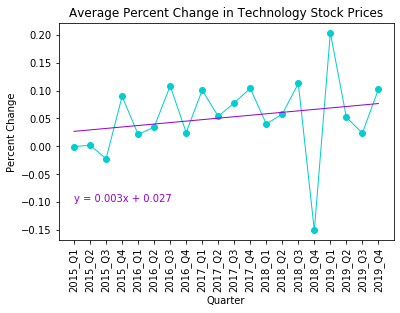

In [9]:
# Set the x and y values
x_values = predict_info_tech_df['Quarter']
y_values = predict_info_tech_df['Percent Change']

# The numeric value of the x axis
x_val = range(20)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_values)

# Create equation of line to calculate predicted 
regress_values = x_val * slope + intercept
line_eq = f'y = {round(slope,3)}x + {round(intercept,3)}'


# Plot the line graph and linear regression
tech_per_chg, = plt.plot(x_values, y_values, marker='o', color='darkturquoise',
                        linewidth=1)
line, = plt.plot(x_values, regress_values, linewidth=1, color='darkviolet')
plt.annotate(line_eq, (0, -0.1), color='darkviolet')

# Rotate the x axis tick marks
plt.xticks(rotation=90)

# Create title and labels for the x and y axis
plt.title('Average Percent Change in Technology Stock Prices')
plt.xlabel('Quarter')
plt.ylabel('Percent Change')

plt.show()

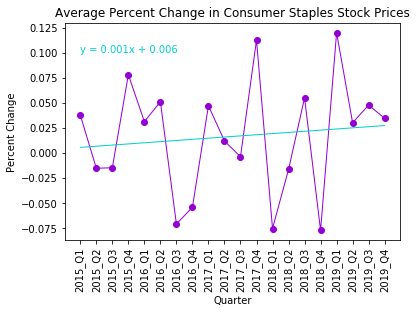

In [10]:
# Set the x and y values
x_values = predict_consumer_staples_df['Quarter']
y_values = predict_consumer_staples_df['Percent Change']

# The numeric value of the x axis
x_val = range(20)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_values)

# Create equation of line to calculate predicted 
regress_values = x_val * slope + intercept
line_eq = f'y = {round(slope,3)}x + {round(intercept,3)}'


# Plot the line graph and linear regression
tech_per_chg, = plt.plot(x_values, y_values, marker='o', color='darkviolet',
                        linewidth=1)
line, = plt.plot(x_values, regress_values, linewidth=1, color='darkturquoise')
plt.annotate(line_eq, (0, 0.1), color='darkturquoise')

# Rotate the x axis tick marks
plt.xticks(rotation=90)

# Create title and labels for the x and y axis
plt.title('Average Percent Change in Consumer Staples Stock Prices')
plt.xlabel('Quarter')
plt.ylabel('Percent Change')

plt.show()

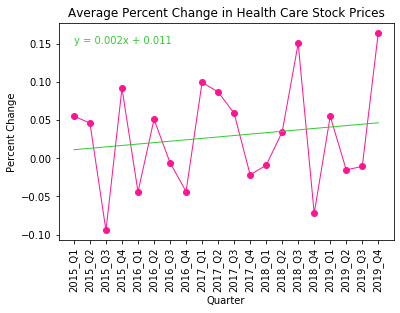

In [11]:
# Set the x and y values
x_values = predict_health_care_df['Quarter']
y_values = predict_health_care_df['Percent Change']

# The numeric value of the x axis
x_val = range(20)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_values)

# Create equation of line to calculate predicted 
regress_values = x_val * slope + intercept
line_eq = f'y = {round(slope,3)}x + {round(intercept,3)}'


# Plot the line graph and linear regression
tech_per_chg, = plt.plot(x_values, y_values, marker='o', color='deeppink',
                        linewidth=1)
line, = plt.plot(x_values, regress_values, linewidth=1, color='limegreen')
plt.annotate(line_eq, (0, 0.15), color='limegreen')

# Rotate the x axis tick marks
plt.xticks(rotation=90)

# Create title and labels for the x and y axis
plt.title('Average Percent Change in Health Care Stock Prices')
plt.xlabel('Quarter')
plt.ylabel('Percent Change')

plt.show()

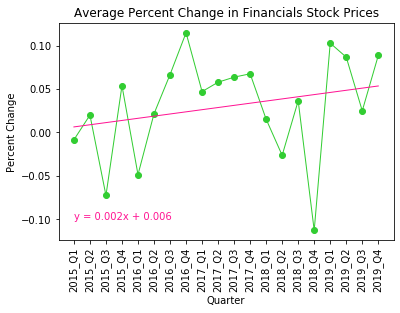

In [12]:
# Set the x and y values
x_values = predict_finance_df['Quarter']
y_values = predict_finance_df['Percent Change']

# The numeric value of the x axis
x_val = range(20)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_values)

# Create equation of line to calculate predicted 
regress_values = x_val * slope + intercept
line_eq = f'y = {round(slope,3)}x + {round(intercept,3)}'


# Plot the line graph and linear regression
tech_per_chg, = plt.plot(x_values, y_values, marker='o', color='limegreen',
                        linewidth=1)
line, = plt.plot(x_values, regress_values, linewidth=1, color='deeppink')
plt.annotate(line_eq, (0, -0.1), color='deeppink')

# Rotate the x axis tick marks
plt.xticks(rotation=90)

# Create title and labels for the x and y axis
plt.title('Average Percent Change in Financials Stock Prices')
plt.xlabel('Quarter')
plt.ylabel('Percent Change')

plt.show()

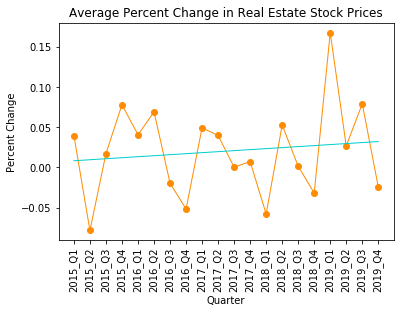

In [13]:
# Set the x and y values
x_values = predict_real_estate_df['Quarter']
y_values = predict_real_estate_df['Percent Change']

# The numeric value of the x axis
x_val = range(20)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_values)

# Create equation of line to calculate predicted 
regress_values = x_val * slope + intercept
line_eq = f'y = {round(slope,3)}x + {round(intercept,3)}'


# Plot the line graph and linear regression
tech_per_chg, = plt.plot(x_values, y_values, marker='o', color='darkorange',
                        linewidth=1)
line, = plt.plot(x_values, regress_values, linewidth=1, color='darkturquoise')
plt.annotate(line_eq, (0, -0.1), color='darkturquoise')

# Rotate the x axis tick marks
plt.xticks(rotation=90)

# Create title and labels for the x and y axis
plt.title('Average Percent Change in Real Estate Stock Prices')
plt.xlabel('Quarter')
plt.ylabel('Percent Change')

plt.show()